In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


(array([0, 1]), [Text(0, 0, 'Одобрено'), Text(1, 0, 'Отказ')])

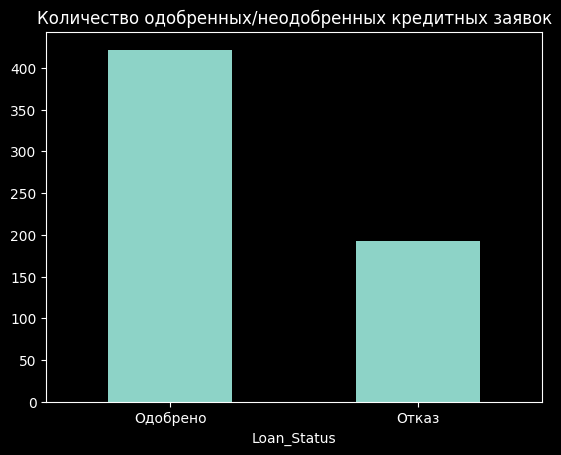

In [33]:
#столбчатая диаграмма
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 'Одобрено', 'N': 'Отказ'})
df['Loan_Status'].value_counts().plot(kind='bar', title='Количество одобренных/неодобренных кредитных заявок')

plt.xticks(rotation=0)



треть всех заявок - отказные ,а одобренных заявок в два раза больше отказных.

Text(0, 0.5, 'Количество заявок')

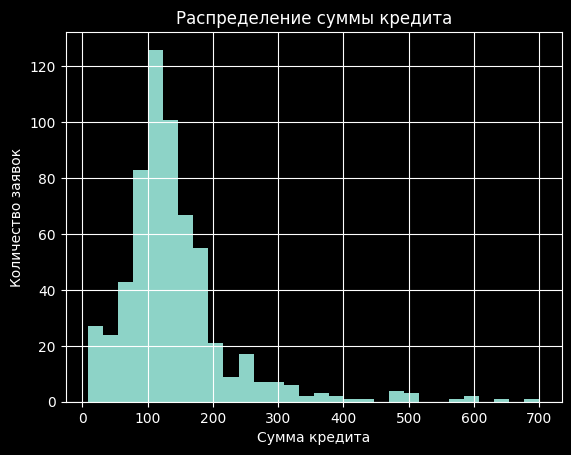

In [34]:
#гистограмма
df['Loan_Amount'].hist(bins=30)
plt.title("Распределение суммы кредита")
plt.xlabel("Сумма кредита")
plt.ylabel("Количество заявок")

Большая часть заявок на сумму в диапазоне от 100 до 150.

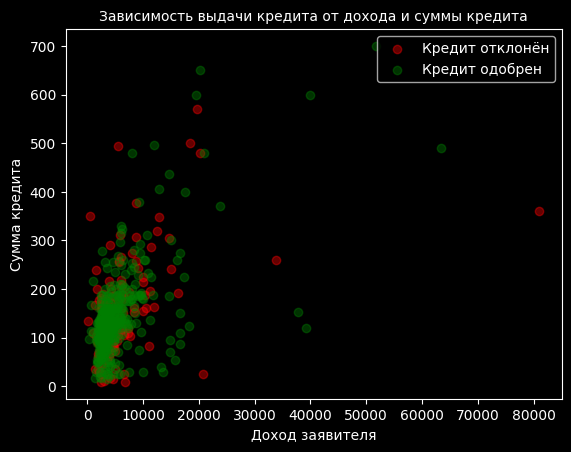

In [36]:
#точечная диаграмма
df_0 = df[df.Loan_Status == 'Отказ']
df_1 = df[df.Loan_Status == 'Одобрено']


plt.scatter(df_0['Applicant_Income'], df_0['Loan_Amount'],
            color="red", label="Кредит отклонён", alpha=0.4)

plt.scatter(df_1['Applicant_Income'], df_1['Loan_Amount'],
            color="green", label="Кредит одобрен", alpha=0.4)


plt.xlabel("Доход заявителя")
plt.ylabel("Сумма кредита")
plt.title("Зависимость выдачи кредита от дохода и суммы кредита", fontsize=10)

# легенда
plt.legend(loc='upper right')
plt.show()

Чаще выдают кредиты до 200 клиентам с доходом до 10000.

Loan_Status   Одобрено  Отказы
Education                     
Graduate           340     140
Not Graduate        82      52


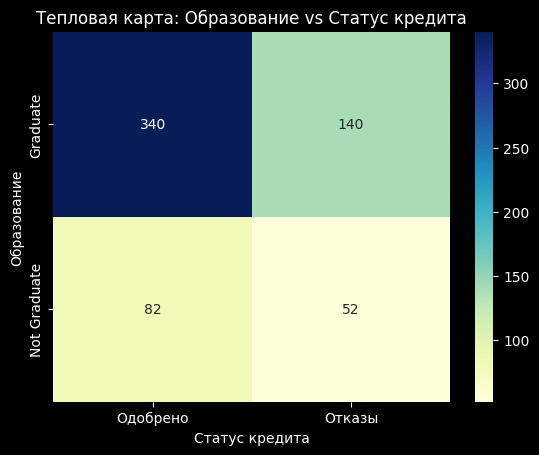

In [56]:
import seaborn as sns
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv"
df = pd.read_csv(url)

df['Loan_Status'] = df['Loan_Status'].replace({'Y': 'Одобрено', 'N': 'Отказы'})

#сводная таблица
ct = pd.crosstab(df['Education'], df['Loan_Status'])
print(ct)

#тепловая карта
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Тепловая карта: Образование vs Статус кредита")
plt.ylabel("Образование")
plt.xlabel("Статус кредита")
plt.show()


Чаще одобряют кредиты клиентам со статусом Graduate